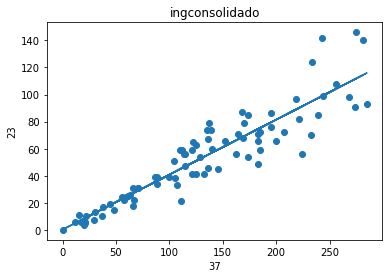

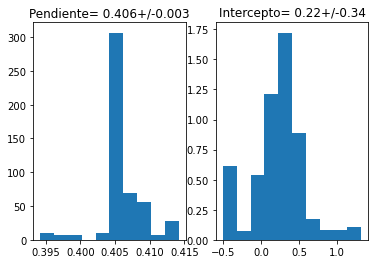

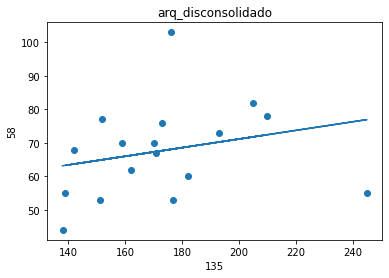

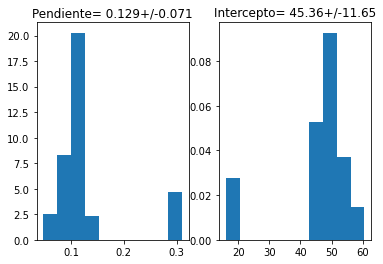

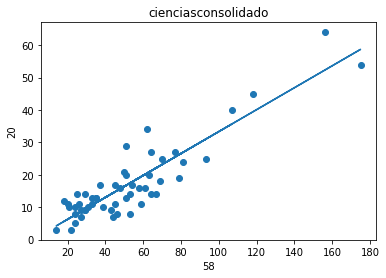

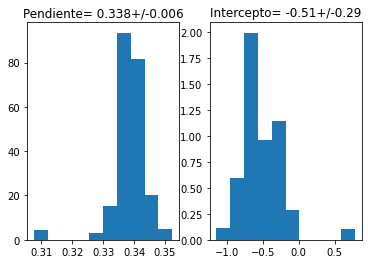

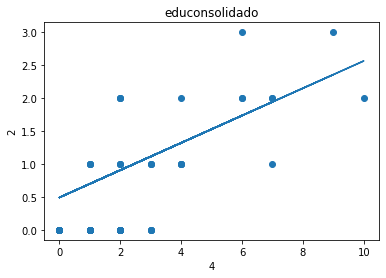

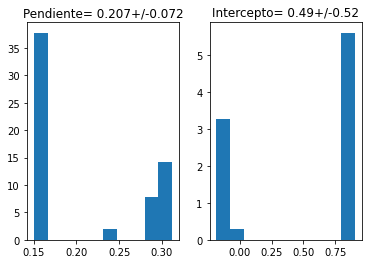

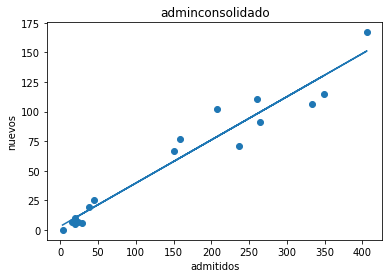

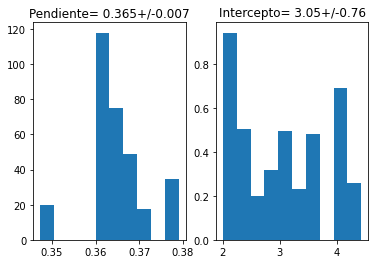

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
facultades=["ing","arq_dis","ciencias","edu","admin"]
for i in facultades:
    ing=pd.read_csv(i+".csv", delimiter="	")
    semestres=np.unique(ing[ing.keys()[0]])
    x=np.array(ing[ing.keys()[2]])
    y=np.array(ing[ing.keys()[3]])
    for o in range(len(x)): 
        if np.isnan(x[o]) == True:
            x[o]=0
    for o in range(len(y)): 
        if np.isnan(y[o]) == True:
            y[o]=0

    n_iter=1000
    regresion = sklearn.linear_model.LinearRegression()
    pendiente=np.zeros(n_iter)
    intercepto=np.zeros(n_iter)
    for f in range(n_iter):
        y_r=np.random.choice(y)
        tt=y != y_r
        u=x[tt]
        v=y[tt]
        regresion.fit(u.reshape(-1,1),v)
        pendiente[f]=regresion.coef_
        
        intercepto[f]=regresion.intercept_
    m=pendiente.mean()
    b=intercepto.mean()
    plt.figure()
    plt.title( i+"consolidado")
    plt.scatter(x,y)
    plt.xlabel(ing.keys()[2])
    plt.ylabel(ing.keys()[3])
    plt.plot(x,m*x+b)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title("Pendiente= "+str(round(pendiente.mean(),3))+"+/-"+str(round(pendiente.std(),3)))
    ax1.hist(pendiente,density=True)
    ax2.set_title("Intercepto= "+str(round(intercepto.mean(),2))+"+/-"+str(round(intercepto.std(),2)))
    ax2.hist(intercepto,density=True)




<ipython-input-8-07b6c6adf41a>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

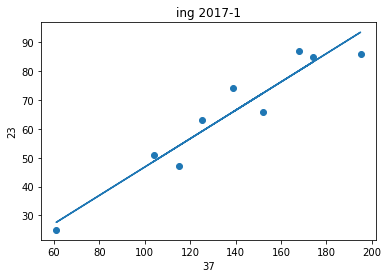

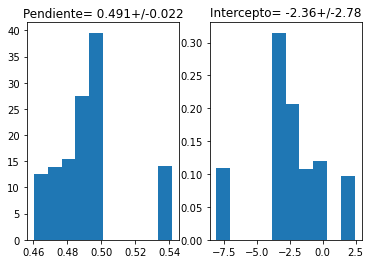

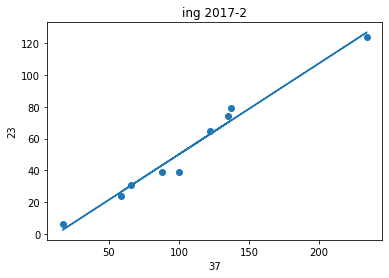

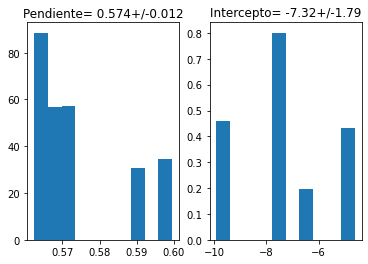

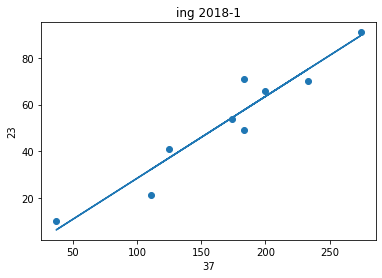

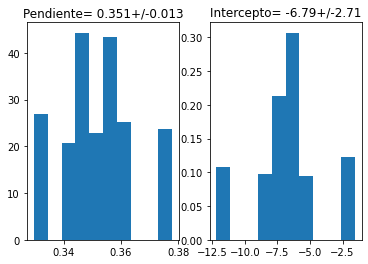

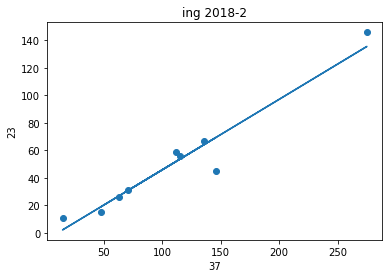

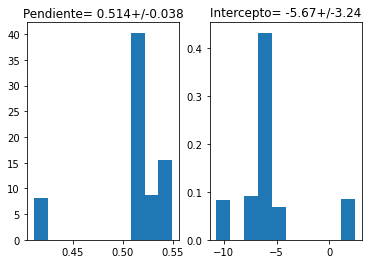

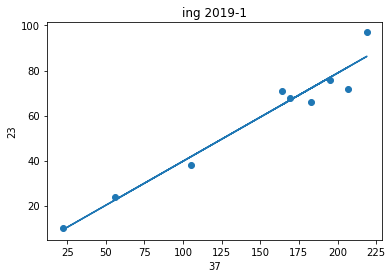

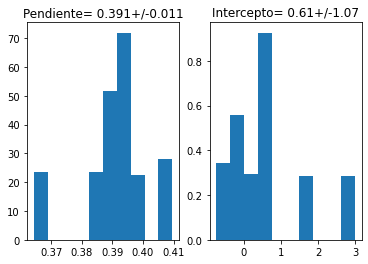

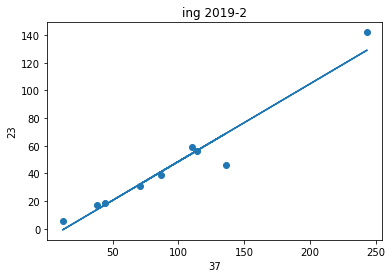

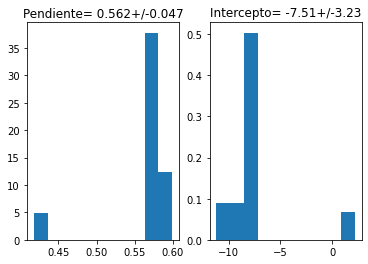

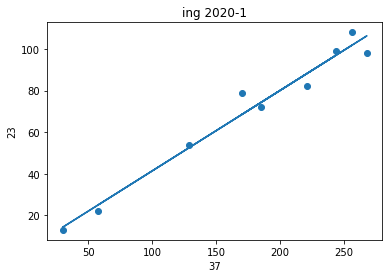

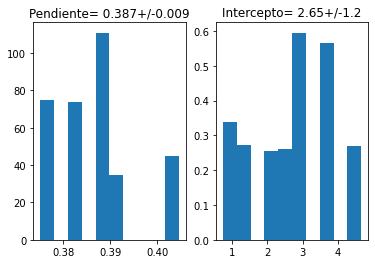

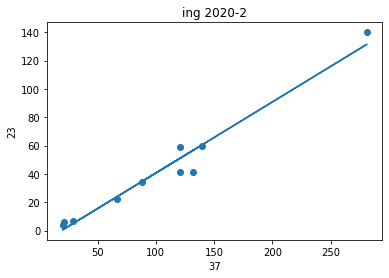

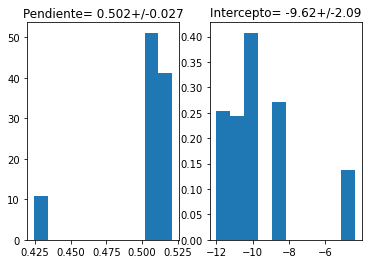

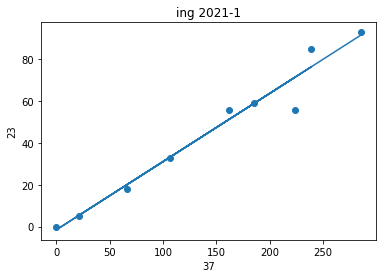

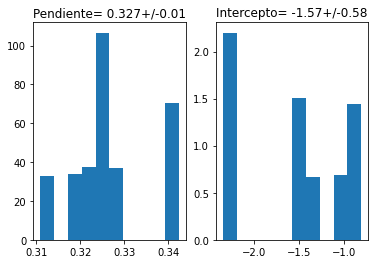

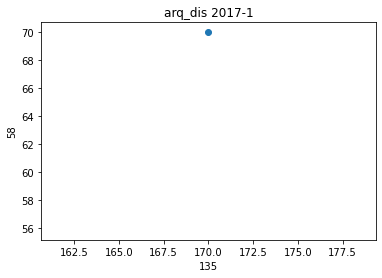

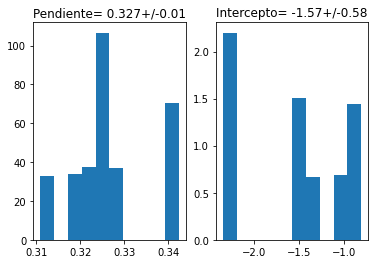

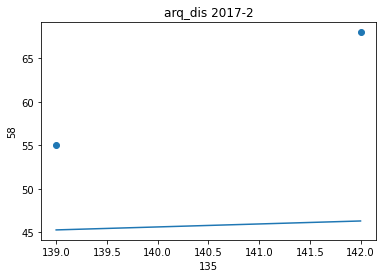

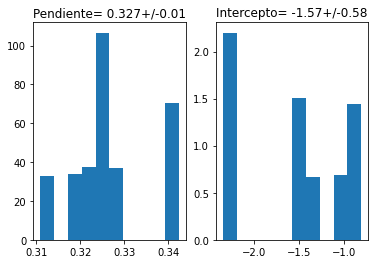

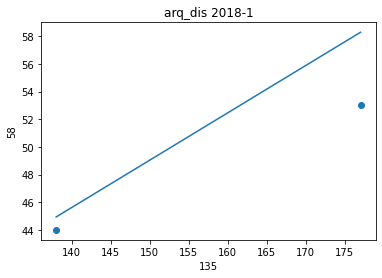

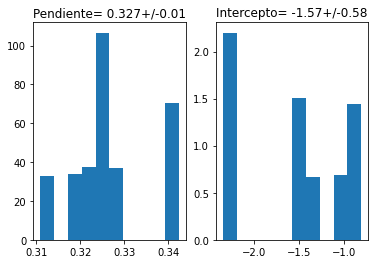

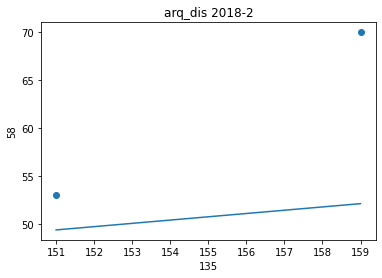

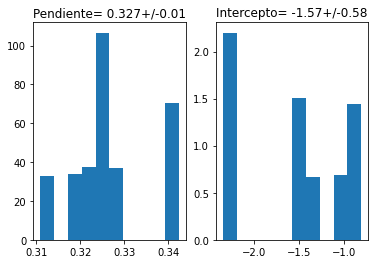

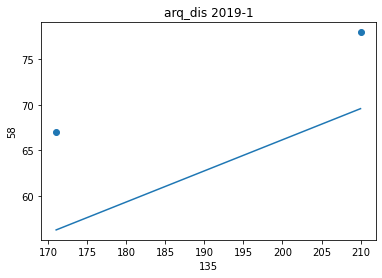

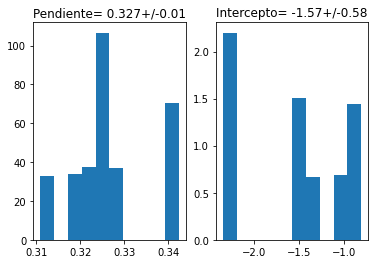

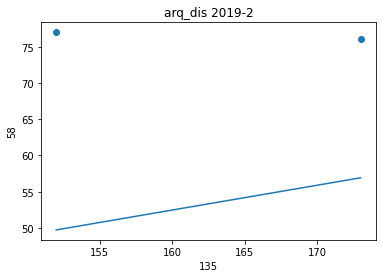

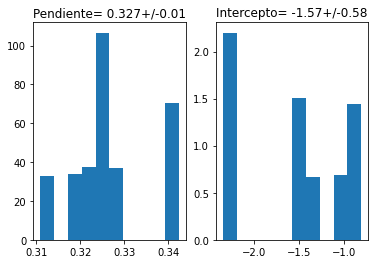

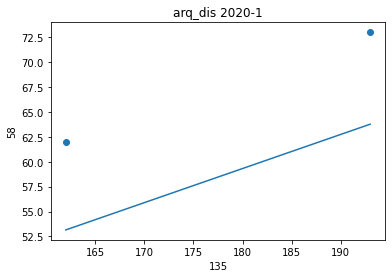

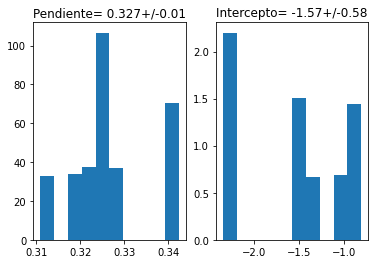

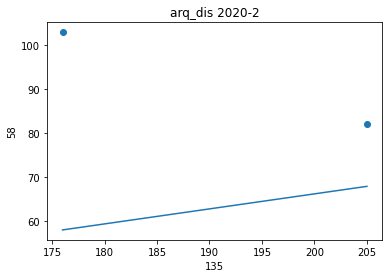

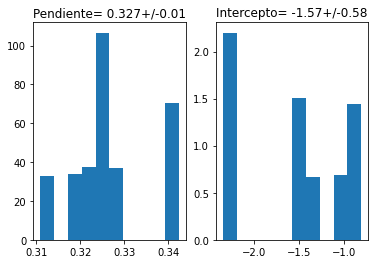

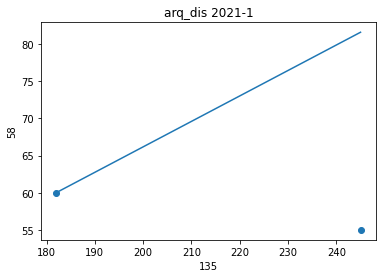

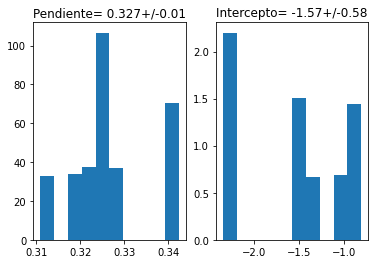

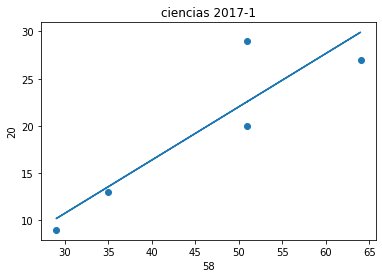

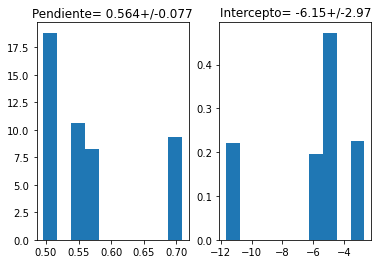

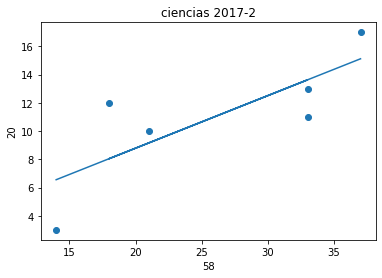

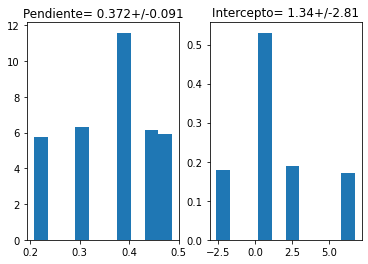

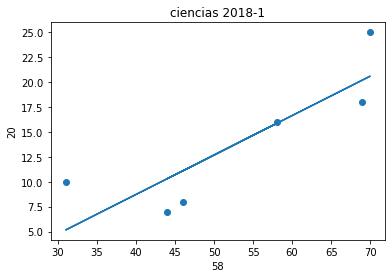

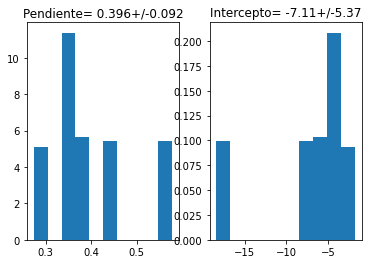

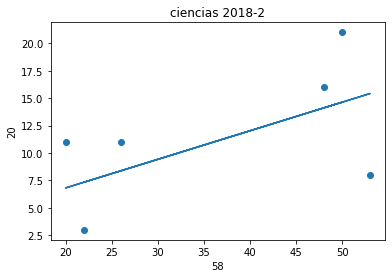

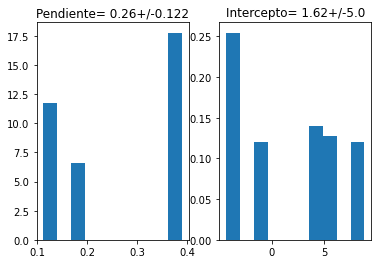

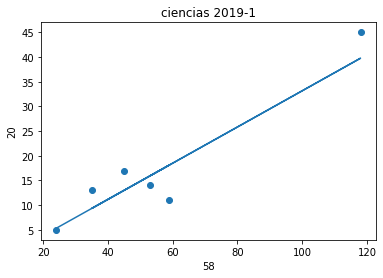

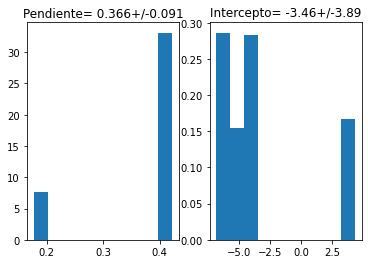

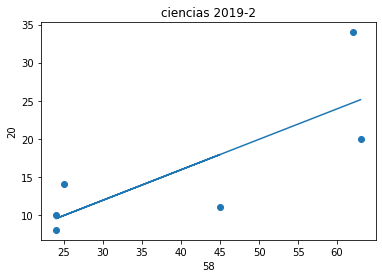

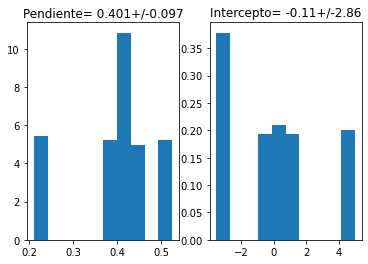

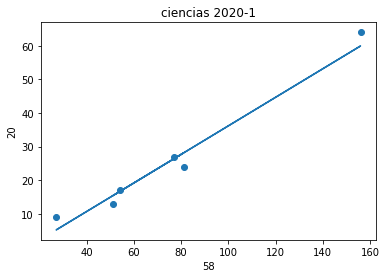

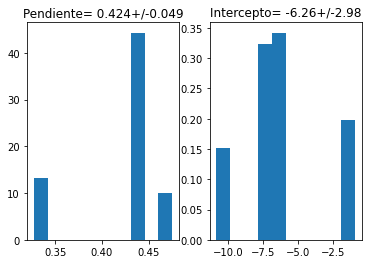

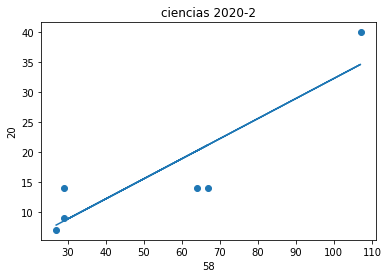

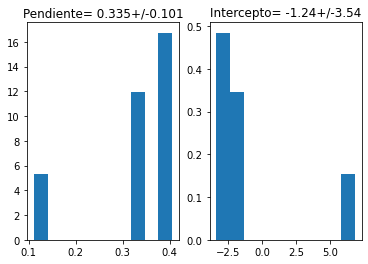

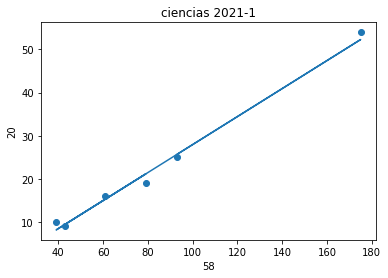

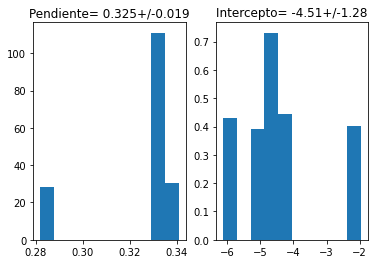

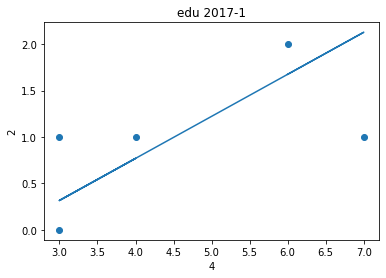

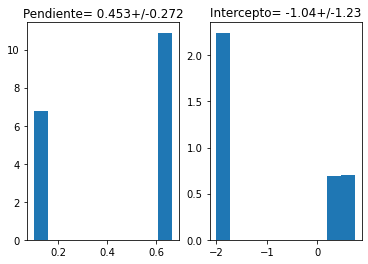

In [8]:

for i in facultades:
    ing=pd.read_csv(i+".csv", delimiter="	")
    semestres=np.unique(ing[ing.keys()[0]])
    for s in semestres:
        ss= np.array(ing[ing.keys()[0]]) ==s
        x=np.array(ing[ing.keys()[2]])[ss]
        y=np.array(ing[ing.keys()[3]])[ss]
        for o in range(len(x)): 
            if np.isnan(x[o]) == True:
                x[o]=0
        for o in range(len(y)): 
            if np.isnan(y[o]) == True:
                y[o]=0

        n_iter=1000
        regresion = sklearn.linear_model.LinearRegression()
        if len(x)>3:
            pendiente=np.zeros(n_iter)
            intercepto=np.zeros(n_iter)
            for f in range(n_iter):
                y_r=np.random.choice(y)
                tt=y != y_r
                u=x[tt]
                v=y[tt]
                regresion.fit(u.reshape(-1,1),v)
                pendiente[f]=regresion.coef_
                intercepto[f]=regresion.intercept_
            m=pendiente.mean()
            b=intercepto.mean()
        else:
            regresion.fit(u.reshape(-1,1),v)
            m=regresion.coef_
            b=regresion.intercept_
        plt.figure()
        plt.title( i+" "+s)
        plt.scatter(x,y)
        plt.xlabel(ing.keys()[2])
        plt.ylabel(ing.keys()[3])
        plt.plot(x,m*x+b)
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_title("Pendiente= "+str(round(pendiente.mean(),3))+"+/-"+str(round(pendiente.std(),3)))
        ax1.hist(pendiente,density=True)
        ax2.set_title("Intercepto= "+str(round(intercepto.mean(),2))+"+/-"+str(round(intercepto.std(),2)))
        ax2.hist(intercepto,density=True)

Ingeniería Ambiental
27.27272727272727 Pendiente= 35.4+/-2.0
Ingeniería Biomédica
25.0 Pendiente= 28.7+/-1.6
Ingeniería Civil
31.891891891891895 Pendiente= 27.6+/-2.5
Ingeniería Eléctrica
23.809523809523807 Pendiente= 31.2+/-1.7999999999999998
Ingeniería Electrónica
30.8411214953271 Pendiente= 35.199999999999996+/-0.8
Ingeniería Industrial
35.56485355648535 Pendiente= 40.1+/-5.4
Ingeniería Mecánica
34.5679012345679 Pendiente= 21.3+/-1.5
Ingeniería Química
38.63636363636363 Pendiente= 25.900000000000002+/-1.0999999999999999
Ingeniería de Sistemas
32.631578947368425 Pendiente= 35.099999999999994+/-1.0
[35.4 28.7 27.6 31.2 35.2 40.1 21.3 25.9 35.1]
[0.635 0.769 0.714 0.748 0.951 0.355 0.723 0.803 0.828]
[ 46  77  76 146  76 251  98 168 135 183 112 207 114 256 140]


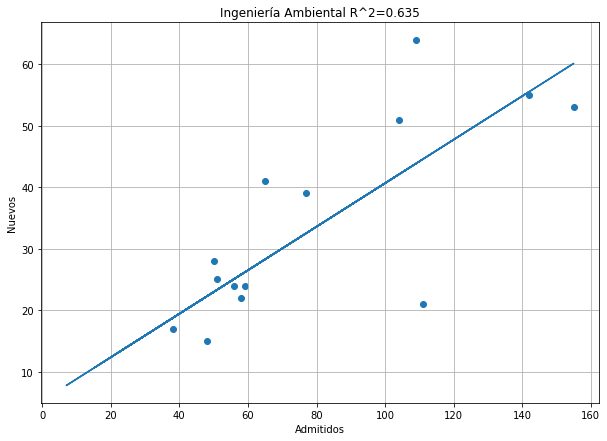

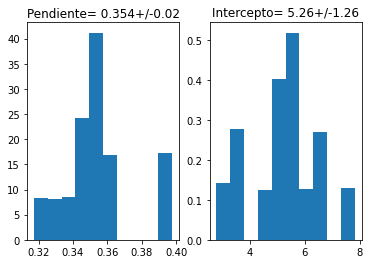

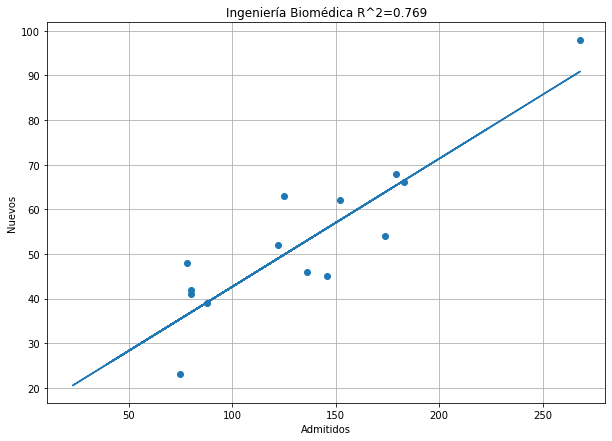

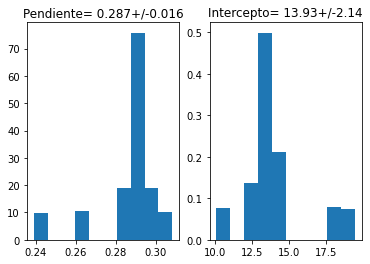

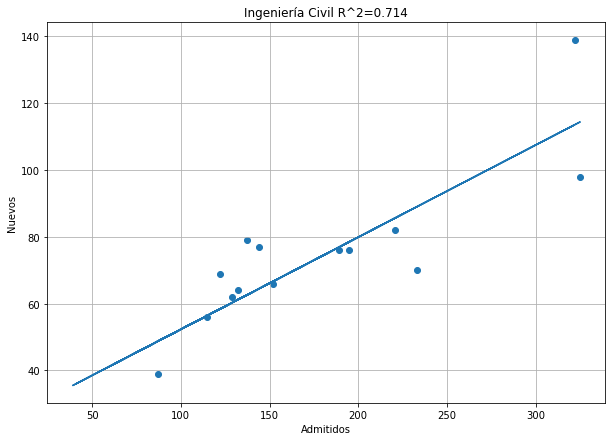

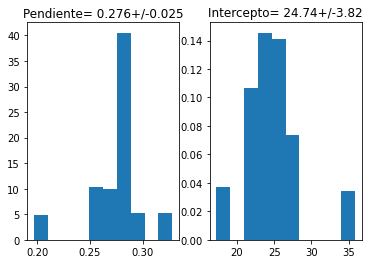

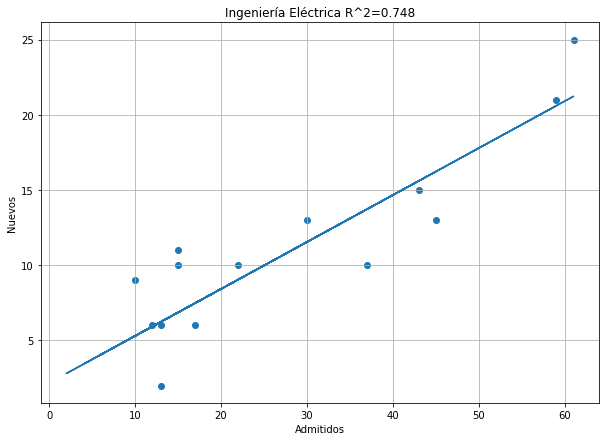

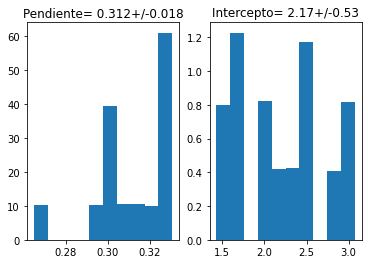

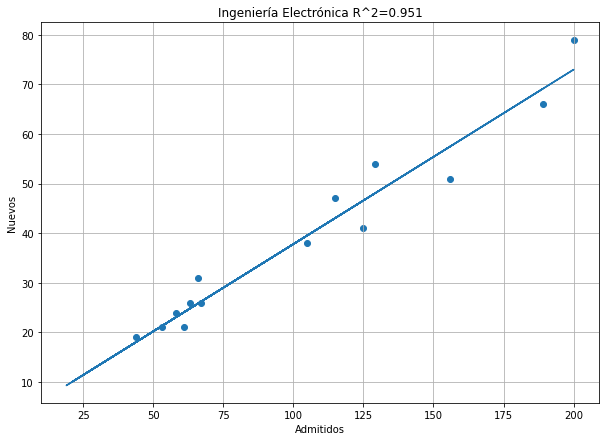

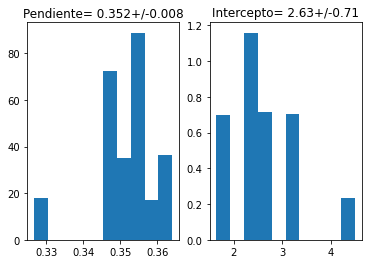

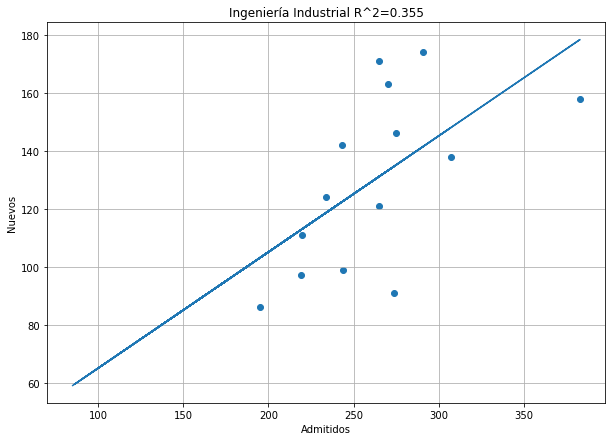

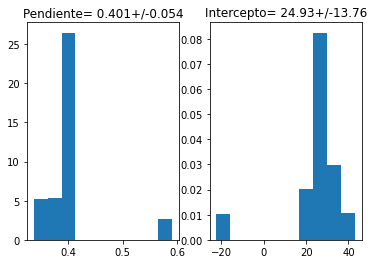

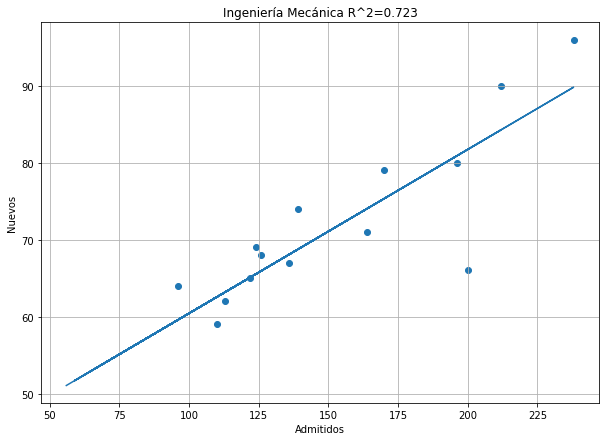

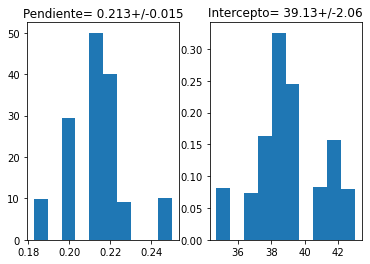

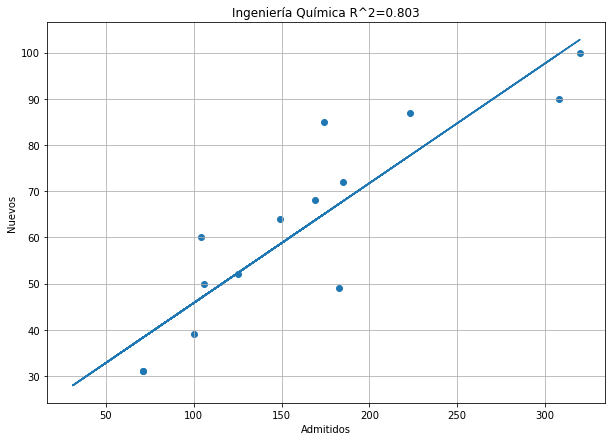

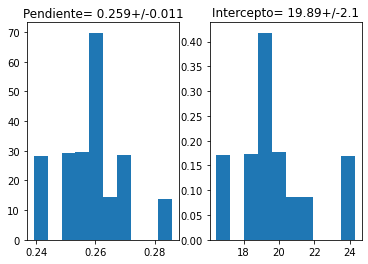

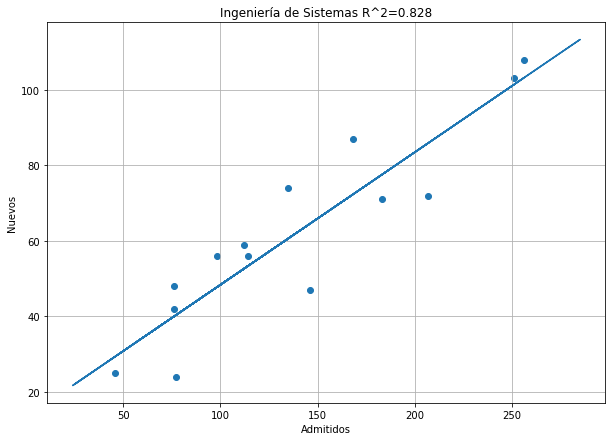

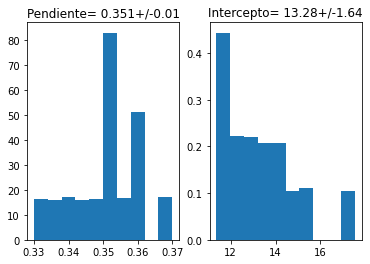

In [34]:
from sklearn.metrics import r2_score
ing=pd.read_csv("ingenierias(def).csv", delimiter="	")
conteo = -1
tasa_2021 = np.array([18/66, 56/224, 59/185, 5/21, 33/107, 85/239, 56/162, 34/88, 93/285])
pendientes = np.zeros(9)
R = np.zeros(9)
for name in ing.keys():
    conteo = conteo + 1
    admitidos=[]
    nuevos=[]
    x=ing[name]
    for i in range(len(ing[name])):
        if i%2==0:
            admitidos.append(x[i])
        else:
            nuevos.append(x[i]) 
    admitidos=np.array(admitidos)[:-1]
    nuevos=np.array(nuevos)[:-1]
    tasa2021=nuevos[-1]/admitidos[-1]
    plt.figure(figsize = (10,7))
    
    plt.scatter(admitidos[:-1],nuevos[:-1])
    plt.xlabel("Admitidos")
    plt.ylabel("Nuevos")
    n_iter=10000
    regresion = sklearn.linear_model.LinearRegression()
    pendiente=np.zeros(n_iter)
    intercepto=np.zeros(n_iter)
    
    for f in range(n_iter):
        y_r=np.random.choice(nuevos)
        tt=nuevos != y_r
        u=admitidos[tt]
        v=nuevos[tt]
        regresion.fit(u.reshape(-1,1),v)
        pendiente[f]=regresion.coef_
        intercepto[f]=regresion.intercept_
    m=pendiente.mean()
    b=intercepto.mean()
    plt.title(name+" R^2="+str(round(r2_score(nuevos,regresion.predict(admitidos.reshape(-1,1))),3)))
    plt.plot(x,m*x+b)
    plt.grid()
    plt.savefig(name)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.title("Regresión "+ name)
    ax1.set_title("Pendiente= "+str(round(pendiente.mean(),3))+"+/-"+str(round(pendiente.std(ddof=1),3)))
    ax1.hist(pendiente,density=True)
    ax2.set_title("Intercepto= "+str(round(intercepto.mean(),2))+"+/-"+str(round(intercepto.std(),2)))
    ax2.hist(intercepto,density=True)
    print(name)
    print(100*tasa_2021[conteo],"Pendiente= "+str(100*round(pendiente.mean(),3))+"+/-"+str(100*round(pendiente.std(ddof=1),3)))
    pendientes[conteo] = 100*round(pendiente.mean(),3)
    R[conteo] = round(r2_score(nuevos,regresion.predict(admitidos.reshape(-1,1))),3)
print(pendientes)
print(R)
print(admitidos)

In [19]:
ing.keys()

Index(['Ingeniería Ambiental', 'Ingeniería Biomédica', 'Ingeniería Civil',
       'Ingeniería Eléctrica', 'Ingeniería Electrónica',
       'Ingeniería Industrial', 'Ingeniería Mecánica', 'Ingeniería Química',
       'Ingeniería de Sistemas'],
      dtype='object')

In [22]:
ing

,Ingeniería Ambiental,Ingeniería Biomédica,Ingeniería Civil,Ingeniería Eléctrica,Ingeniería Electrónica,Ingeniería Industrial,Ingeniería Mecánica,Ingeniería Química,Ingeniería de Sistemas
0,65,80,132,13,61,265,96,125,46
1,41,42,64,2,21,171,64,52,25
2,155,122,325,43,156,383,212,320,77
3,53,52,98,15,51,158,90,100,24
4,77,75,144,13,58,291,126,149,76
5,39,23,77,6,24,174,68,64,48
6,142,152,322,45,200,307,238,308,146
7,55,62,139,13,79,138,96,90,47
8,51,80,122,15,53,270,124,106,76
9,25,41,69,10,21,163,69,50,42


In [30]:
Admitidos = np.loadtxt('Admitidos.csv', delimiter = ',')
Nuevos = np.loadtxt('Nuevos.csv', delimiter = ',')

ValueError: Found input variables with inconsistent numbers of samples: [9, 135]

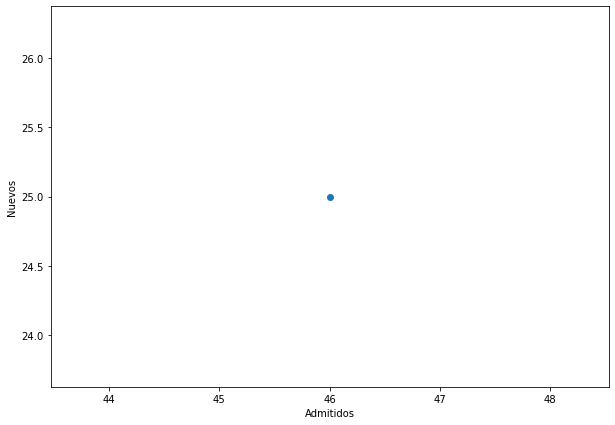

In [33]:
from sklearn.metrics import r2_score
nombre = np.array(['Ambiental', 'Biomedica', 'Civil', 'Electrica', 'Electronica', 'Industrial', 'Mecanica', 'Quimica', 'Sistemas'])
for i in range(len(nombres)):
    plt.figure(figsize = (10,7))
    
    plt.scatter(admitidos[i],nuevos[i])
    plt.xlabel("Admitidos")
    plt.ylabel("Nuevos")
    n_iter=10000
    regresion = sklearn.linear_model.LinearRegression()
    pendiente=np.zeros(n_iter)
    intercepto=np.zeros(n_iter)
    
    for f in range(n_iter):
        y_r=np.random.choice(Nuevos[i])
        tt=Nuevos != y_r
        u=Admitidos[tt]
        v=Nuevos[tt]
        regresion.fit(u.reshape(-1,1),v)
        pendiente[f]=regresion.coef_
        intercepto[f]=regresion.intercept_
    m=pendiente.mean()
    b=intercepto.mean()
    plt.title(nombre[i] +" R^2="+str(round(r2_score(Nuevos,regresion.predict(Admitidos.reshape(-1,1))),3)))
    plt.plot(x,m*x+b)
    plt.grid()
    plt.savefig(nombre)